# Plot the Annular mode indices in the CMIP6



## Import modules


In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import os

import calendar
import datetime as dt

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# %matplotlib inline

from read_AM_index_mod import Reanalysis, CMIP6

with open("model_list.txt", "r") as f:
    model_list = f.readlines()
    model_list = [d.replace("\n", "") for d in model_list]
model_list.remove("CESM2")
model_list.remove("CESM2-WACCM")
# model_list.remove("HadGEM3-GC31-LL")
# model_list.remove("HadGEM3-GC31-MM")
model_list.remove("KACE")
# model_list.remove("UKESM1")

plev = [1000.,  850.,  700.,  500.,  250.,  100.,   50.,   10.]

## Load JRA55 and CMIP6 data

In [2]:
D0 = Reanalysis(name_dir='jra_55', year_start=1958, year_end=2014, plev=plev, name='JRA55', \
        annual_cycle_fft=4, running_mean=0, save_index=True)
NAM, NAM_mean, NAM_anomaly = D0.cal_AM_anomaly('NAM')
D0.NAM_mean = NAM_mean
SAM, SAM_mean, SAM_anomaly = D0.cal_AM_anomaly('SAM')
D0.SAM_mean = SAM_mean
print(D0.name)
D0.load_data()

D_list = []
for model in model_list:
    D = CMIP6(name_dir=model, year_start=1958, year_end=2014, plev=plev, name=model, source_dir='cmip6', \
            annual_cycle_fft=4, running_mean=0, save_index=True)
    NAM, NAM_mean, NAM_anomaly = D.cal_AM_anomaly('NAM')
    D.NAM_mean = NAM_mean
    SAM, SAM_mean, SAM_anomaly = D.cal_AM_anomaly('SAM')
    D.SAM_mean = SAM_mean
    print(D.name)
    D.load_data()
    D_list.append(D)

print(f"total number of models: {len(D_list)}")


JRA55
Reading from saved data ......
ACCESS-CM2
Reading from saved data ......
BCC-ESM1
Reading from saved data ......
CanESM5
Reading from saved data ......
CNRM-CM6
Reading from saved data ......
CNRM-CM6-HR
Reading from saved data ......
CNRM-ESM2
Reading from saved data ......
EC-Earth3
Reading from saved data ......
FGOALS-f3-L
Reading from saved data ......
FGOALS-g3
Reading from saved data ......
GFDL-ESM4
Reading from saved data ......
HadGEM3-GC31-LL
Reading from saved data ......
HadGEM3-GC31-MM
Reading from saved data ......
INM-CM4
Reading from saved data ......
INM-CM5
Reading from saved data ......
IPSL-CM6A-LR
Reading from saved data ......
MIROC6
Reading from saved data ......
MIROC-ES2L
Reading from saved data ......
MPI-ESM-1-2-HAM
Reading from saved data ......
MPI-ESM1-2-HR
Reading from saved data ......
MPI-ESM1-2-LR
Reading from saved data ......
MRI-ESM2
Reading from saved data ......
NorESM2-LM
Reading from saved data ......
NorESM2-MM
Reading from saved data ..

## Plot the annual cycle of Z10

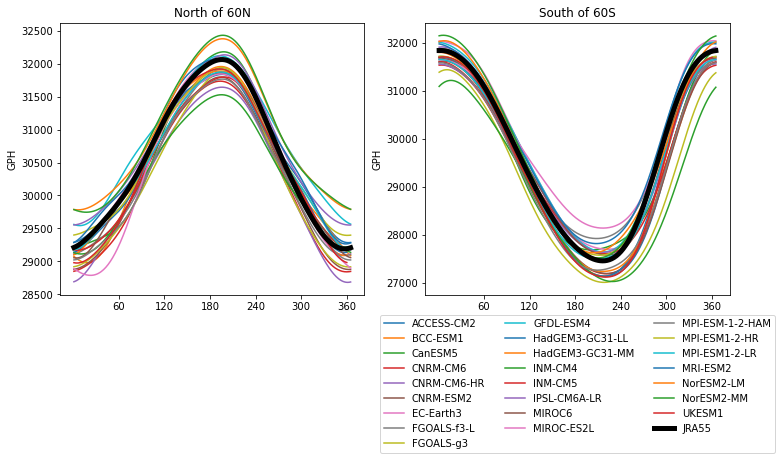

In [3]:
def plot_1year(data, p_level=10, plot="NAM"):
        ysize = data.length_of_year
        time = np.linspace(1.0, ysize, ysize)
        ki = np.isin(data.level, p_level)

        if plot == "NAM":
                ax1.plot(time, data.NAM_mean[:, ki], label=data.name)
        else:
                ax1.plot(time, data.SAM_mean[:, ki], label=data.name)
        ax1.set_xticks(np.linspace(60, 360, 6))
        ax1.set_ylabel('GPH')
        if plot == "NAM":
                ax1.set_title('North of 60N')
        else:
                ax1.set_title('South of 60S')
        # ax1.set_title(f'{data.name}')
        # ax1.axis([1, 365, -4, 4])
        #ax1.axhline(y=0, color='k', linestyle='--')
        ax1.grid()

ysize = D0.length_of_year # including calendar = "360_day"
time = np.linspace(1, ysize, ysize)
p_level = 10
ki = np.isin(D0.level, p_level)

fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1, 2, 1)
for i, D in enumerate(D_list):
    plot_1year(D, p_level=p_level, plot="NAM")
ax1.plot(time, D0.NAM_mean[:, ki], color='k', linewidth=5, label=D0.name)

ax1 = fig.add_subplot(1, 2, 2)
for i, D in enumerate(D_list):
    plot_1year(D, p_level=p_level, plot="SAM")
ax1.plot(time, D0.SAM_mean[:, ki], color='k', linewidth=5, label=D0.name)

legend = ax1.legend(bbox_to_anchor=(0.5,-0.6), loc='lower center', ncol=3)

# if True:
#         plt.savefig('Figs/Z10_annual_cyle.png', transparent=True)


## Plot the std of AM indices in the annual cycle

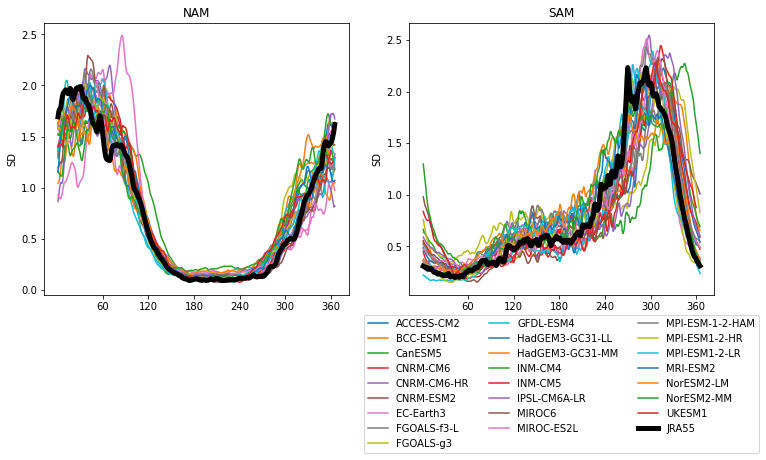

In [4]:
def plot_1year(data, p_level=10, plot="NAM"):
        ysize = data.length_of_year
        time = np.linspace(1.0, ysize, ysize)
        ki = np.isin(data.level, p_level)

        if plot == "NAM":
                ax1.plot(time, np.std(data.NAM[:, ki].reshape(-1, ysize), axis=0), label=data.name)

        else:
                ax1.plot(time, np.std(data.SAM[:, ki].reshape(-1, ysize), axis=0), label=data.name)
        ax1.set_xticks(np.linspace(60, 360, 6))
        ax1.set_ylabel('SD')
        if plot == "NAM":
                ax1.set_title('NAM')
        else:
                ax1.set_title('SAM')
        # ax1.set_title(f'{data.name}')
        # ax1.axis([1, 365, -4, 4])
        #ax1.axhline(y=0, color='k', linestyle='--')
        ax1.grid()

ysize = D0.length_of_year # including calendar = "360_day"
time = np.linspace(1, ysize, ysize)
p_level = 10
ki = np.isin(D0.level, p_level)

fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1, 2, 1)
for i, D in enumerate(D_list):
    plot_1year(D, p_level=p_level, plot="NAM")
ax1.plot(time, np.std(D0.NAM[:, ki].reshape(-1, ysize), axis=0), color='k', linewidth=5, label=D0.name)

ax1 = fig.add_subplot(1, 2, 2)
for i, D in enumerate(D_list):
    plot_1year(D, p_level=p_level, plot="SAM")
ax1.plot(time, np.std(D0.SAM[:, ki].reshape(-1, ysize), axis=0), color='k', linewidth=5, label=D0.name)

legend = ax1.legend(bbox_to_anchor=(0.5,-0.6), loc='lower center', ncol=3)

# if True:
#         plt.savefig('Figs/AM_annual_cyle.png', transparent=True)


## Plot the covariance function

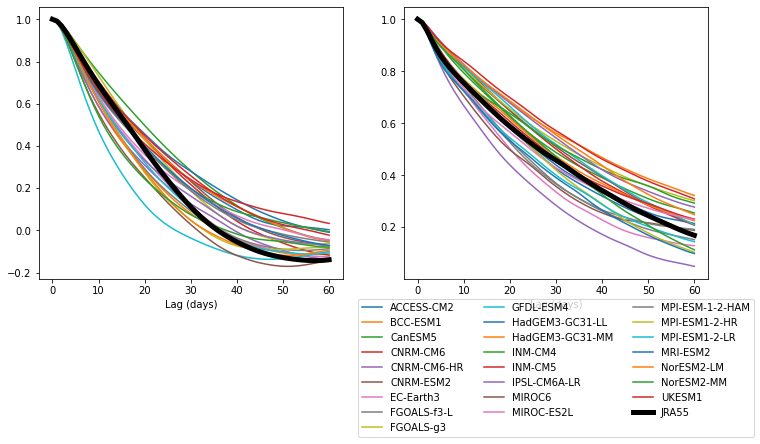

In [9]:
# from AM_plot_mod import plot_cov
def plot_cov(data, p_level, lag_time=60, plot="NAM"):

    if plot == "NAM":
        y = data.NAM.data
    else:
        y = data.SAM.data
    k = np.isin(data.level, p_level).nonzero()[0][0]
    data_size = len(y)
    lags = np.linspace(0, lag_time, lag_time+1)
    Ct = np.array([y[lag:, k].T @ y[0:data_size-lag, k] / (data_size-lag) for lag in np.arange(0, lag_time+1)])

    # # fitting to an exp function
    # from scipy.optimize import curve_fit
    # func = lambda x, b: np.exp(-b * x)
    # popt, pcov = curve_fit(func, lags, Ct/Ct[0])

    # fig1 = plt.figure(figsize=(12,5))
    # ax1 = fig1.add_subplot(1,2,1)
    ax1.plot(lags, Ct/Ct[0], label=data.name)
    # ax1.plot(lags, func(lags, *popt), '--k', label=f'exp(-t/{1/popt[0]:.1f})')
    ax1.set_xlabel('Lag (days)')
    # ax1.legend()

# y = D0.NAM.data  # remove the mask in NAM

y = D0.NAM.data
lag_time = 60
k = np.isin(D0.level, p_level).nonzero()[0][0]
data_size = len(y)
lags = np.linspace(0, lag_time, lag_time+1)
Ct = np.array([y[lag:, k].T @ y[0:data_size-lag, k] / (data_size-lag) for lag in np.arange(0, lag_time+1)])

fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1, 2, 1)
for i, D in enumerate(D_list):
    plot_cov(D, p_level=10, lag_time=lag_time, plot="NAM")
ax1.plot(lags, Ct/Ct[0], color='k', linewidth=5, label=D0.name)

y = D0.SAM.data
data_size = len(y)
Ct = np.array([y[lag:, k].T @ y[0:data_size-lag, k] / (data_size-lag) for lag in np.arange(0, lag_time+1)])

ax1 = fig.add_subplot(1, 2, 2)
for i, D in enumerate(D_list):
    plot_cov(D, p_level=10, lag_time=lag_time, plot="SAM")
ax1.plot(lags, Ct/Ct[0], color='k', linewidth=5, label=D0.name)

legend = ax1.legend(bbox_to_anchor=(0.5,-0.6), loc='lower center', ncol=3)

# if True:
#         plt.savefig('Figs/Z10_lag.png', transparent=True)


## Plot lagged regression


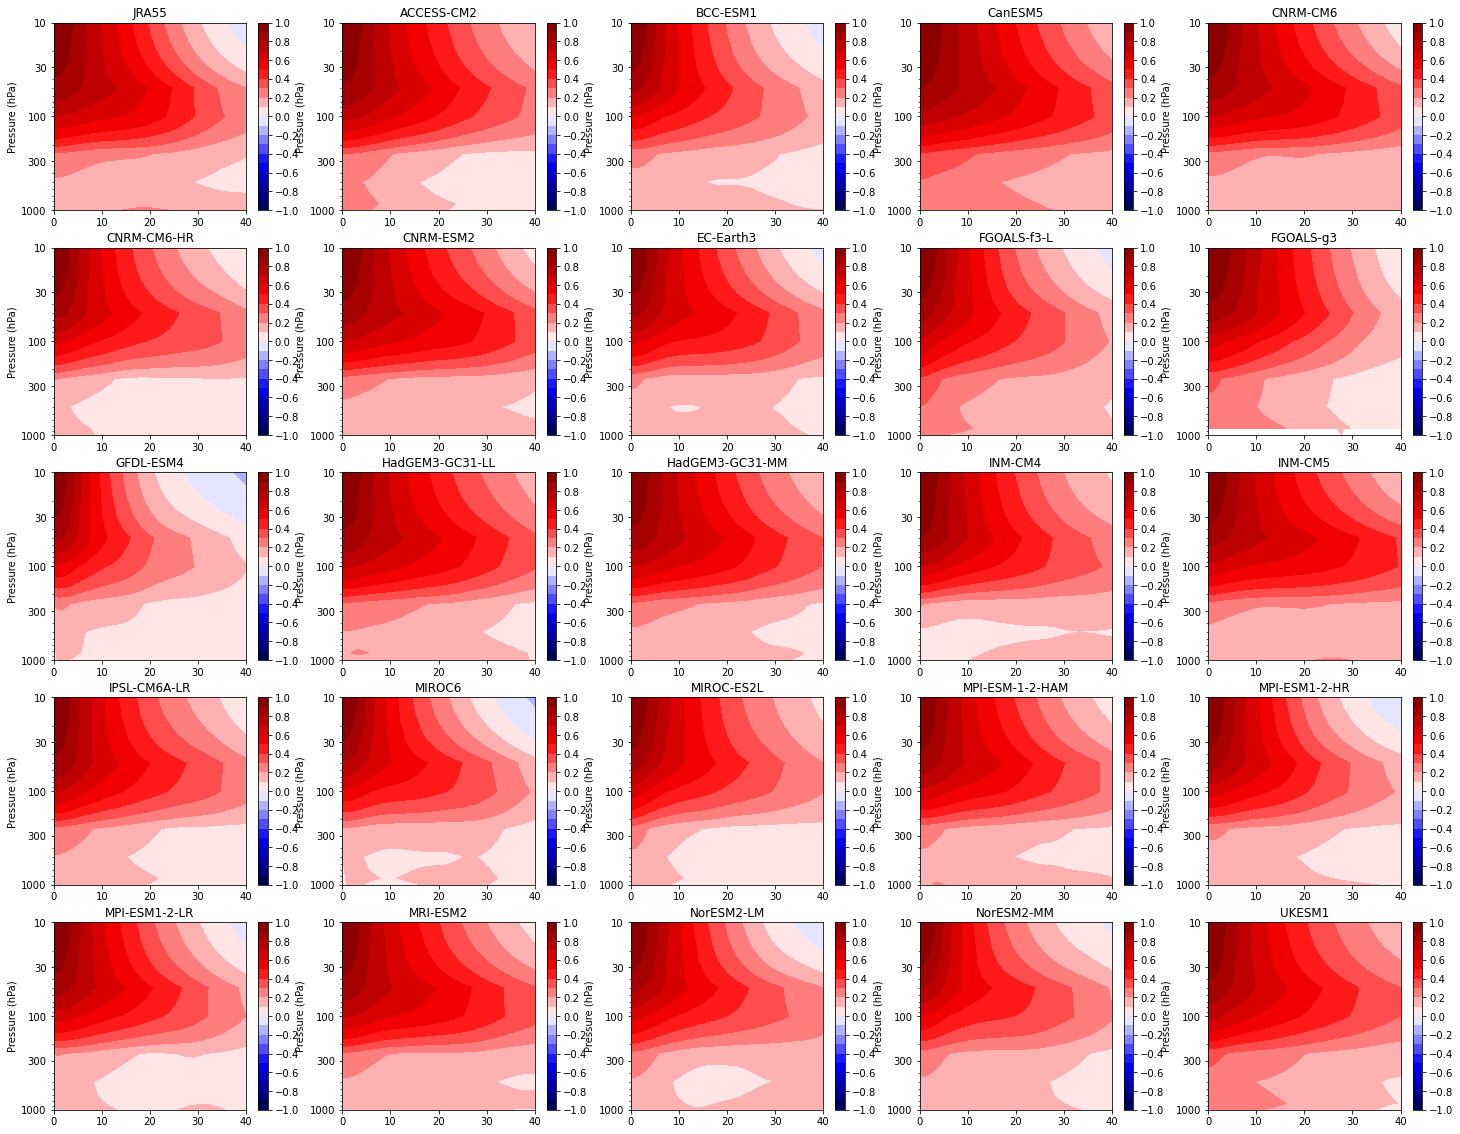

In [12]:
# from AM_plot_mod import plot_lag_reg
def plot_lag_reg(y, p, lag_time=40, model=None):

    data_size = len(y)
    kk = np.isin(p, 10).nonzero()[0][0]
    lags = np.linspace(0, lag_time, lag_time+1)

    Ct_p = np.zeros((lag_time+1, y.shape[1]))
    for lag in range(lag_time+1):
        Ct_p[lag, :] = y[lag:, :].T @ y[0:data_size-lag, kk] / (data_size-lag)
        
    cmax = 1
    cm = 'seismic' # 'bwr' 
    # fig = plt.figure(figsize=(12,5))
    # ax = fig.add_subplot(1,2,1)
    plt.contourf(lags, p, Ct_p.T, np.linspace(-cmax, cmax, 21), cmap=cm)
    cbar = plt.colorbar()
    cbar.set_ticks(np.linspace(-cmax, cmax, 11))
    plt.gca().invert_yaxis()
    # plt.xlabel('lag (days)')
    plt.ylabel('Pressure (hPa)')
    plt.yscale('log')
    plt.yticks([10, 30, 100, 300, 1000])
    plt.gca().get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
    plt.title(f"{model}")

fig = plt.figure(figsize=(25,20))
ax1 = fig.add_subplot(5, 5, 1)
y = D0.NAM.data
p = D0.level
plot_lag_reg(y, p, model=D0.name)

for i, D in enumerate(D_list):
    ax1 = fig.add_subplot(5, 5, i+2)
    y = D.NAM.data
    p = D.level
    plot_lag_reg(y, p, model=D.name)


# if True:
#         plt.savefig('Figs/AM_reg.png', transparent=True)

## Make composite for strong and weak vortex events


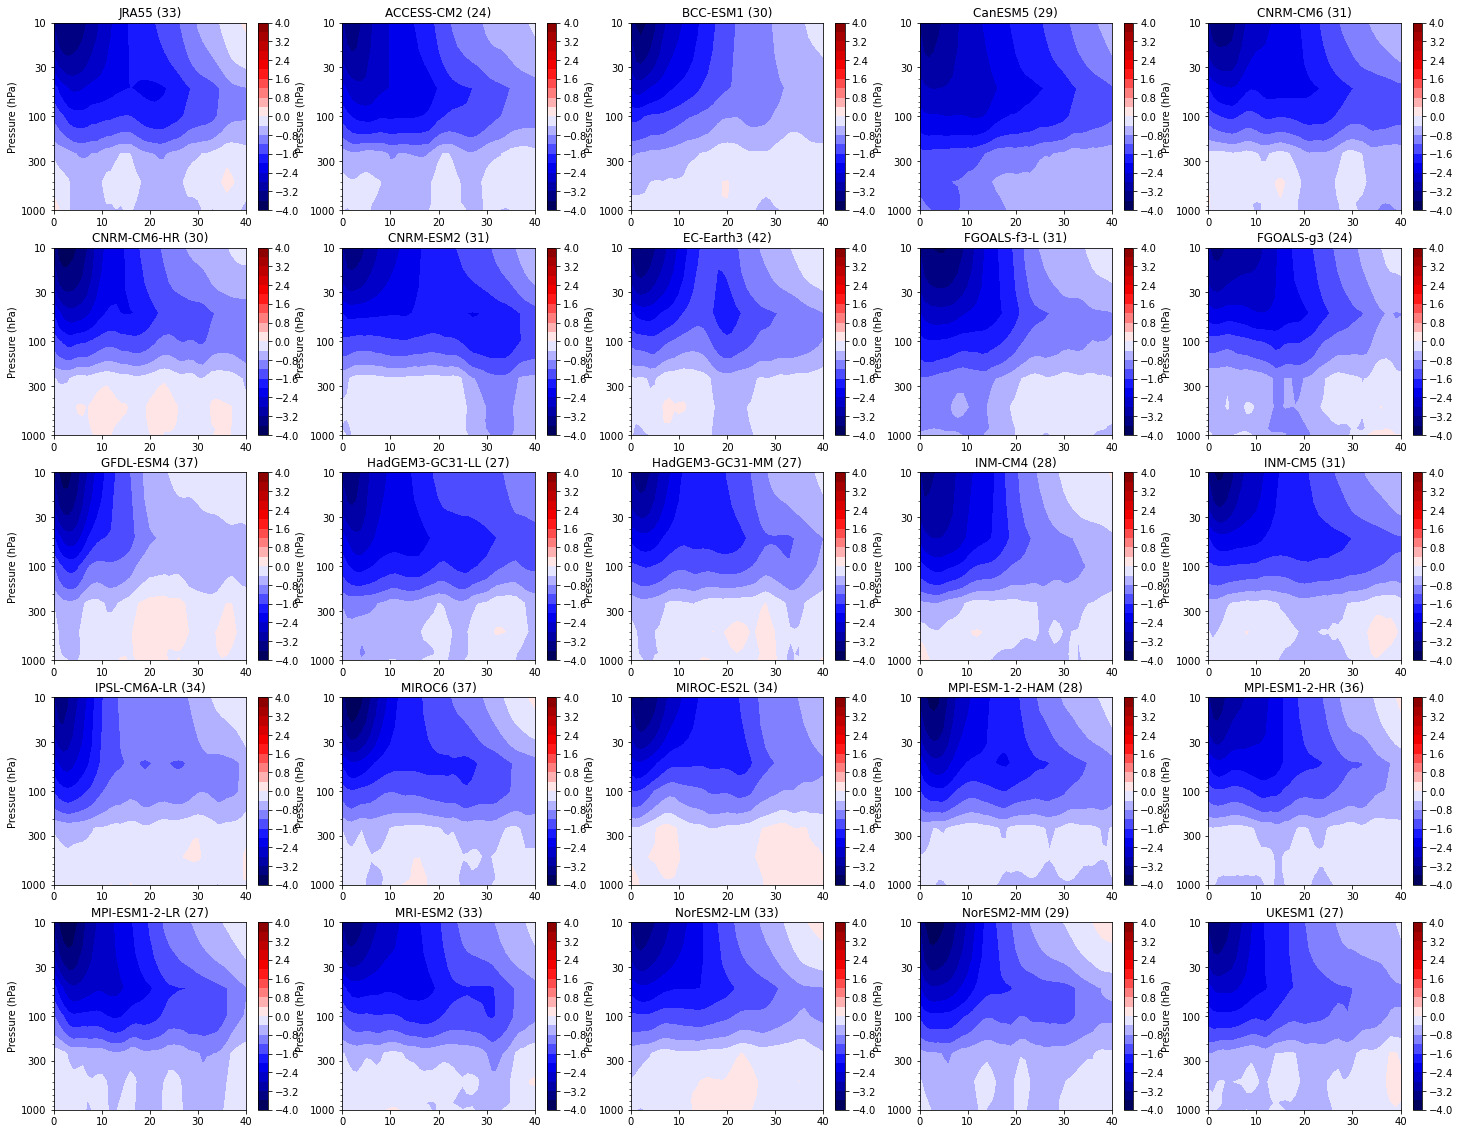

In [11]:
# from AM_plot_mod import plot_event

#=============================================================
# plot composites for weak and strong vortex events
#=============================================================
def find_event(y, p, threshold=-3, separation=30, lag_time=60):
    """
    y(t, x): input data, where t is time, and x is space
    p(x): pressure levels
    """
    
    # composite based on the annular mode index at p_level = 10 hPa
    p_level = 10
    kk = np.isin(p, p_level).nonzero()[0][0]
    y10 = y[:, kk]

    if threshold > 0:
        idx_threshold = np.argwhere(y10 > threshold)
    else:
        idx_threshold = np.argwhere(y10 < threshold)

    idx_event = idx_threshold[0]
    for idx in idx_threshold[1:]:
        if idx - idx_event[-1] > separation:
            idx_event = np.vstack((idx_event, idx))

    y_event = np.zeros((0, lag_time+1, y.shape[1]))
    for idx in idx_event:
        i = idx.item()
        if i+lag_time+1 <= len(y):
            y_event = np.vstack((y_event, y[i:i+lag_time+1, :][None,:]))

    return y_event

def plot_event(y, p, lag_time=60, event=None, model=None):
    """
    y(t, x): input data, where t is time, and x is space
    p(x): pressure levels
    """

    lags = np.linspace(0, lag_time, lag_time+1)

    if event == 'negative':
        y_neg_event = find_event(y, p, threshold=-3, lag_time=lag_time)
    else:
        y_pos_event = find_event(y, p, threshold=1.5, lag_time=lag_time)

    cmax = 4
    cm = 'seismic' # 'bwr' 
    # fig = plt.figure(figsize=(12,10))
    # ax = fig.add_subplot(2,2,1)
    if event == 'negative':
        plt.contourf(lags, p, y_neg_event.mean(axis=0).T, np.linspace(-cmax, cmax, 21), cmap=cm)
        cbar = plt.colorbar()
        cbar.set_ticks(np.linspace(-cmax, cmax, 11))
        plt.gca().invert_yaxis()
        # plt.xlabel('lag (days)')
        plt.ylabel('Pressure (hPa)')
        plt.yscale('log')
        plt.yticks([10, 30, 100, 300, 1000])
        plt.gca().get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
        plt.title(f'{model} ({len(y_neg_event)})')
    else:
        ax = fig.add_subplot(2,2,2)
        plt.contourf(lags, p, y_pos_event.mean(axis=0).T, np.linspace(-cmax, cmax, 21), cmap=cm)
        cbar = plt.colorbar()
        cbar.set_ticks(np.linspace(-cmax, cmax, 11))
        plt.gca().invert_yaxis()
        # plt.xlabel('lag (days)')
        plt.ylabel('Pressure (hPa)')
        plt.yscale('log')
        plt.yticks([10, 30, 100, 300, 1000])
        plt.gca().get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
        plt.title(f'{model} ({len(y_pos_event)})')


fig = plt.figure(figsize=(25,20))
ax1 = fig.add_subplot(5, 5, 1)
y = D0.NAM.data
p = D0.level
plot_event(y, p, lag_time=40, event='negative', model=D0.name)

for i, D in enumerate(D_list):
    ax1 = fig.add_subplot(5, 5, i+2)
    y = D.NAM.data
    p = D.level
    plot_event(y, p, lag_time=40, event='negative', model=D.name)


# if True:
#         plt.savefig('Figs/Z10_events.png', transparent=True)

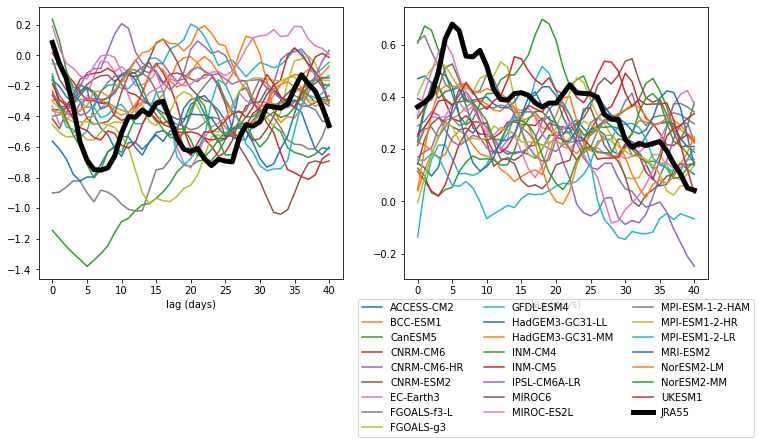

In [13]:
def plot_event2(y, p, lag_time=60, event=None, model=None):
    """
    y(t, x): input data, where t is time, and x is space
    p(x): pressure levels
    """

    lags = np.linspace(0, lag_time, lag_time+1)

    if event == 'negative':
        y_neg_event = find_event(y, p, threshold=-3, lag_time=lag_time)
    else:
        y_pos_event = find_event(y, p, threshold=1.5, lag_time=lag_time)

    # plot the evolution of annular mode at p_output
    p_output = 850 
    k = np.isin(p, p_output).nonzero()[0][0]

    if event == 'negative':
        # fig = plt.figure(figsize=(12,5))
        # ax = fig.add_subplot(1,2,1)
        if model == "JRA55":
            plt.plot(lags, y_neg_event.mean(axis=0)[:,k], color='k', linewidth=5, label=model)
        else:
            plt.plot(lags, y_neg_event.mean(axis=0)[:,k], label=model)
        plt.xlabel('lag (days)')
        # plt.title(f'weak vortex composite (p={p[k]})')
    else:
        # ax = fig.add_subplot(1,2,2)
        if model == "JRA55":
            plt.plot(lags, y_pos_event.mean(axis=0)[:,k], color='k', linewidth=5, label=model)
        else:
            plt.plot(lags, y_pos_event.mean(axis=0)[:,k], label=model)
        plt.xlabel('lag (days)')
        # plt.title(f'{model} ({len(y_pos_event)})')


fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1, 2, 1)
for i, D in enumerate(D_list):
    y = D.NAM.data
    p = D.level
    plot_event2(y, p, lag_time=40, event='negative', model=D.name)

y = D0.NAM.data
p = D0.level
plot_event2(y, p, lag_time=40, event='negative', model=D0.name)

ax1 = fig.add_subplot(1, 2, 2)
for i, D in enumerate(D_list):
    y = D.NAM.data
    p = D.level
    plot_event2(y, p, lag_time=40, event='postive', model=D.name)

y = D0.NAM.data
p = D0.level
plot_event2(y, p, lag_time=40, event='positive', model=D0.name)

legend = ax1.legend(bbox_to_anchor=(0.5,-0.6), loc='lower center', ncol=3)

# if True:
#         plt.savefig('Figs/Z10_events_850.png', transparent=True)